In [2]:
import pandas as pd

In [74]:
df = pd.read_csv('aac_shelter_outcomes.csv')
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [75]:
len(df)

78256

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  78248 non-null  object
 1   animal_id         78256 non-null  object
 2   animal_type       78256 non-null  object
 3   breed             78256 non-null  object
 4   color             78256 non-null  object
 5   date_of_birth     78256 non-null  object
 6   datetime          78256 non-null  object
 7   monthyear         78256 non-null  object
 8   name              54370 non-null  object
 9   outcome_subtype   35963 non-null  object
 10  outcome_type      78244 non-null  object
 11  sex_upon_outcome  78254 non-null  object
dtypes: object(12)
memory usage: 7.2+ MB


In [77]:
df.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
count,78248,78256,78256,78256,78256,78256,78256,78256,54370,35963,78244,78254
unique,46,70855,5,2128,525,5869,64361,64361,14574,19,9,5
top,1 year,A718223,Dog,Domestic Shorthair Mix,Black/White,2014-05-05T00:00:00,2016-04-18T00:00:00,2016-04-18T00:00:00,Bella,Partner,Adoption,Neutered Male
freq,14355,11,44242,23335,8153,112,39,39,344,19660,33112,27784


In [78]:
#удалим столбцы дублирующие информацию и не несущие особого смысла - это можно определить сразу, имя и id никак не влияют на результат:
df.drop(['animal_id', 'datetime', 'monthyear', 'name'], axis=1, inplace=True)

In [79]:
#Нас интересуют только два значения при обучении, значит остальные удалим
df['outcome_type'].value_counts()


Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
Name: outcome_type, dtype: int64

In [80]:
df = df[df['outcome_type'].isin(['Adoption','Transfer'])]
df['outcome_type'].value_counts()

Adoption    33112
Transfer    23499
Name: outcome_type, dtype: int64

In [81]:
#сократим значения столбца, превратив в числовые значения
df['age_upon_outcome'].value_counts()

1 year       9766
2 months     8857
2 years      7147
3 months     3228
3 years      3014
1 month      2894
4 months     2180
4 years      1638
5 months     1554
5 years      1515
6 months     1435
3 weeks      1393
2 weeks      1227
10 months    1014
6 years       989
8 months      977
8 years       852
7 years       798
4 weeks       796
7 months      775
10 years      595
9 months      497
1 weeks       460
1 week        400
9 years       392
11 months     374
12 years      282
3 days        217
2 days        200
11 years      194
13 years      142
6 days        138
1 day         126
4 days        119
5 days         91
14 years       83
0 years        80
15 years       77
5 weeks        49
16 years       21
17 years       14
18 years        3
20 years        3
19 years        2
25 years        1
Name: age_upon_outcome, dtype: int64

In [82]:
#Заменим нулевое значение
df['age_upon_outcome'] = df['age_upon_outcome'].fillna('1 month')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56611 entries, 0 to 78255
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  56611 non-null  object
 1   animal_type       56611 non-null  object
 2   breed             56611 non-null  object
 3   color             56611 non-null  object
 4   date_of_birth     56611 non-null  object
 5   outcome_subtype   29425 non-null  object
 6   outcome_type      56611 non-null  object
 7   sex_upon_outcome  56611 non-null  object
dtypes: object(8)
memory usage: 3.9+ MB


In [84]:
#Функция, которая переводит из строки в месяцы(тип число), если в неделях, то приравнивается к одному месяцу
def replace_age_upon_outcome(row):
    word_list = row['age_upon_outcome'].split()
    num_list = [int(num) for num in filter(lambda num: num.isnumeric(), word_list)]
    if 'year' in row['age_upon_outcome']:
        return num_list[0]*12
    elif 'month' in row['age_upon_outcome']:
        return num_list[0]
    else:
        return 1
       

In [85]:
df['age_upon_outcome_month'] = df.apply(replace_age_upon_outcome,axis=1)
df.head()

,age_upon_outcome,animal_type,breed,color,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_month
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,Partner,Transfer,Intact Male,1
1,1 year,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,Partner,Transfer,Spayed Female,12
2,1 year,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,NaN,Adoption,Neutered Male,12
3,9 years,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,Partner,Transfer,Neutered Male,108
5,4 months,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,Partner,Transfer,Intact Male,4


In [86]:
df['outcome_subtype'].value_counts()

Partner    19660
Foster      5558
SCRP        3211
Snr          626
Offsite      367
Barn           3
Name: outcome_subtype, dtype: int64

In [87]:
df['outcome_subtype'] = df['outcome_subtype'].fillna('Other')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56611 entries, 0 to 78255
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age_upon_outcome        56611 non-null  object
 1   animal_type             56611 non-null  object
 2   breed                   56611 non-null  object
 3   color                   56611 non-null  object
 4   date_of_birth           56611 non-null  object
 5   outcome_subtype         56611 non-null  object
 6   outcome_type            56611 non-null  object
 7   sex_upon_outcome        56611 non-null  object
 8   age_upon_outcome_month  56611 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 4.3+ MB


In [89]:
df.head()

,age_upon_outcome,animal_type,breed,color,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_month
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,Partner,Transfer,Intact Male,1
1,1 year,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,Partner,Transfer,Spayed Female,12
2,1 year,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,Other,Adoption,Neutered Male,12
3,9 years,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,Partner,Transfer,Neutered Male,108
5,4 months,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,Partner,Transfer,Intact Male,4


In [90]:
#Вычислим возраст животного
rom datetime import date
from datetime import datetime

def calculate_age(born):
    today = date.today()
    dt = datetime.strptime(born,'%Y-%m-%dT%H:%M:%S')
    return today.year - dt.year - ((today.month, today.day) < (dt.month, dt.day))

SyntaxError: invalid syntax (<ipython-input-90-7e79c427e147>, line 2)

In [91]:
df['age'] = df.date_of_birth.apply(calculate_age)

In [92]:
df.head()

,age_upon_outcome,animal_type,breed,color,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_month,age
0,2 weeks,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,Partner,Transfer,Intact Male,1,6
1,1 year,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,Partner,Transfer,Spayed Female,12,7
2,1 year,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,Other,Adoption,Neutered Male,12,7
3,9 years,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,Partner,Transfer,Neutered Male,108,15
5,4 months,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,Partner,Transfer,Intact Male,4,7


In [93]:
df['animal_type'].value_counts()

Dog          29570
Cat          26055
Other          772
Bird           206
Livestock        8
Name: animal_type, dtype: int64

In [94]:
#Сделаем три значения у признака, Bird и Livestock заменим на Other #Сделаем 1 - собака, 2 кошка, 0 - другие
df['animal_type'] = df['animal_type'].replace('Bird', 0).replace('Dog', 1).replace('Cat', 2).replace('Livestock', 0).replace('Other', 0)
df.head()

,age_upon_outcome,animal_type,breed,color,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_month,age
0,2 weeks,2,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,Partner,Transfer,Intact Male,1,6
1,1 year,1,Beagle Mix,White/Brown,2012-11-06T00:00:00,Partner,Transfer,Spayed Female,12,7
2,1 year,1,Pit Bull,Blue/White,2013-03-31T00:00:00,Other,Adoption,Neutered Male,12,7
3,9 years,1,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,Partner,Transfer,Neutered Male,108,15
5,4 months,1,Leonberger Mix,Brown/White,2013-06-03T00:00:00,Partner,Transfer,Intact Male,4,7


In [95]:
df['outcome_subtype'].value_counts()

Other      27186
Partner    19660
Foster      5558
SCRP        3211
Snr          626
Offsite      367
Barn           3
Name: outcome_subtype, dtype: int64

In [96]:
#Оставим Partner - 1 и Other 0 , остальные переведем в Other
df['outcome_subtype'] = df['outcome_subtype'].replace('Foster', 'Other').replace('SCRP', 'Other').replace('Snr', 'Other').replace('Offsite', 'Other').replace('Barn', 'Other')
df.head()

,age_upon_outcome,animal_type,breed,color,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_month,age
0,2 weeks,2,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,Partner,Transfer,Intact Male,1,6
1,1 year,1,Beagle Mix,White/Brown,2012-11-06T00:00:00,Partner,Transfer,Spayed Female,12,7
2,1 year,1,Pit Bull,Blue/White,2013-03-31T00:00:00,Other,Adoption,Neutered Male,12,7
3,9 years,1,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,Partner,Transfer,Neutered Male,108,15
5,4 months,1,Leonberger Mix,Brown/White,2013-06-03T00:00:00,Partner,Transfer,Intact Male,4,7


In [97]:
#функция замены пола цифрой, если самец то вернуть 1, если самка, то 0
def replace_sex(row):
    if 'Female' in row.sex_upon_outcome:
        return 0
    else:
        return 1

In [98]:
df['new_sex'] = df.apply(replace_sex,axis=1)
df.head()

,age_upon_outcome,animal_type,breed,color,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_month,age,new_sex
0,2 weeks,2,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,Partner,Transfer,Intact Male,1,6,1
1,1 year,1,Beagle Mix,White/Brown,2012-11-06T00:00:00,Partner,Transfer,Spayed Female,12,7,0
2,1 year,1,Pit Bull,Blue/White,2013-03-31T00:00:00,Other,Adoption,Neutered Male,12,7,1
3,9 years,1,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,Partner,Transfer,Neutered Male,108,15,1
5,4 months,1,Leonberger Mix,Brown/White,2013-06-03T00:00:00,Partner,Transfer,Intact Male,4,7,1


In [99]:
#удалим лишние столбцы, breed и color - слишком большое количество значений строкового типа, тоже удалим, тем более порода и цвет не основной показатель оставлять ли животное в приюте:
df.drop(['age_upon_outcome', 'date_of_birth', 'breed', 'color','sex_upon_outcome'], axis=1, inplace=True)
df.head()

,animal_type,outcome_subtype,outcome_type,age_upon_outcome_month,age,new_sex
0,2,Partner,Transfer,1,6,1
1,1,Partner,Transfer,12,7,0
2,1,Other,Adoption,12,7,1
3,1,Partner,Transfer,108,15,1
5,1,Partner,Transfer,4,7,1


In [100]:
#Заменим числами столбец outcome_type 0 Transfer и 1 Adoption
df['outcome_type'] = df['outcome_type'].replace('Transfer', 0).replace('Adoption', 1)
df.head()

,animal_type,outcome_subtype,outcome_type,age_upon_outcome_month,age,new_sex
0,2,Partner,0,1,6,1
1,1,Partner,0,12,7,0
2,1,Other,1,12,7,1
3,1,Partner,0,108,15,1
5,1,Partner,0,4,7,1


In [103]:
#Заменим числами столбец outcome_subtype, Other - 0 и Partner 1
df['outcome_subtype'] = df['outcome_subtype'].replace('Other', 0).replace('Partner', 1)
df.head()

,animal_type,outcome_subtype,outcome_type,age_upon_outcome_month,age,new_sex
0,2,1,0,1,6,1
1,1,1,0,12,7,0
2,1,0,1,12,7,1
3,1,1,0,108,15,1
5,1,1,0,4,7,1


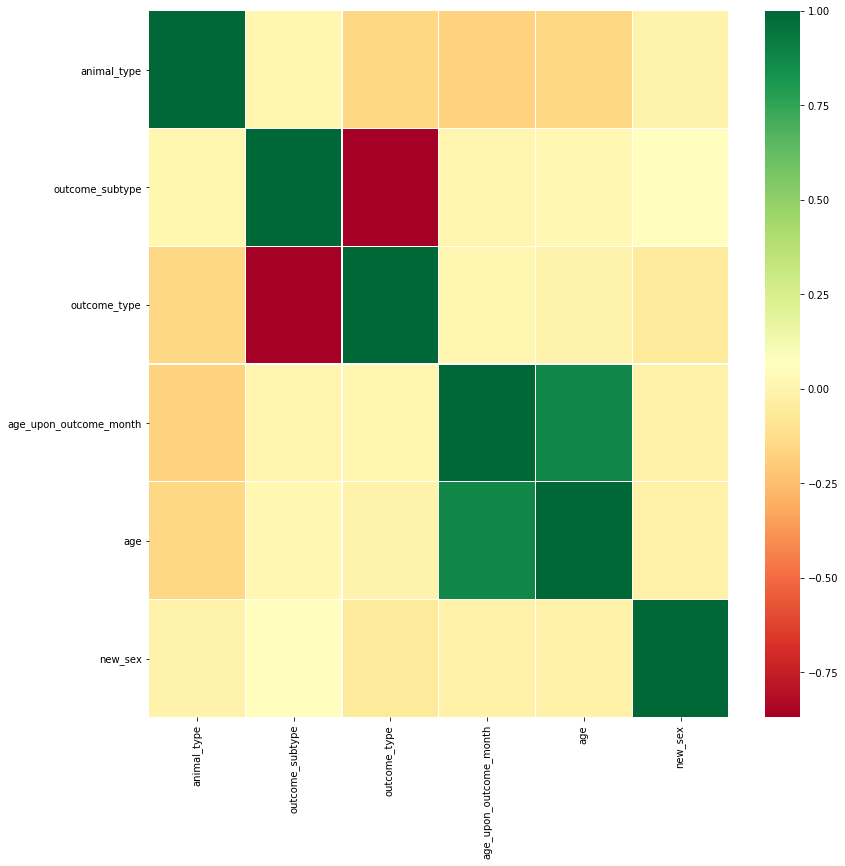

In [104]:
#Проверим корреляцию признаков
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
f, ax = plt.subplots(figsize=(13, 13))
corr = np.round_(df.corr(), decimals=2)
sns.heatmap(corr,annot=False,cmap='RdYlGn',linewidths=0.2)

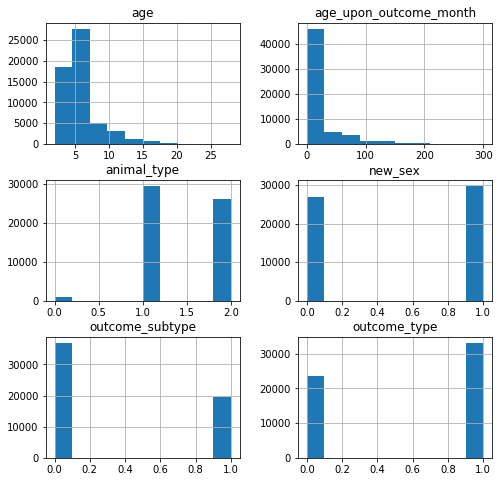

In [106]:
df.hist(figsize=(8,8))
plt.show()

Коэффициент корреляции Пирсона: -0.013714001127563526


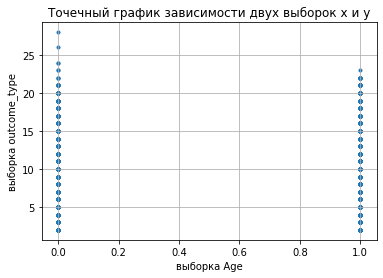

In [115]:
from scipy.stats import pearsonr
plt.xlabel('выборка Age')
plt.ylabel('выборка outcome_type')
plt.title('Точечный график зависимости двух выборок x и y')
plt.grid(True)
plt.scatter(df['outcome_type'], df['age'], marker='.')
corr, p_value = pearsonr(df['outcome_type'], df['age'])
print('Коэффициент корреляции Пирсона:', corr)
#нет зависимости между величинами

In [118]:
#ttest: Нулевая гипотеза, - нет зависимости между полом животного и решением, оставить ег в приюте или нет
from scipy import stats
df_male = df[df['new_sex']==1]['outcome_type']
df_female = df[df['new_sex']==0]['outcome_type']           

print(stats.ttest_ind(df_male, df_female))
#p-value<0.05, значит отвергаем нулевую гипотезу. Есть взаимосвязь между полом и рещением оставить или нет животное в приюте

Ttest_indResult(statistic=-13.742177504627156, pvalue=6.6509510703124784e-43)


In [108]:
X_columns = [c for c in df.columns if c != 'outcome_type']
y_column = 'outcome_type'
X = df[X_columns]
y = df[y_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

estimator = LinearRegression()
estimator.fit(X_train, y_train) # Обучение


y_pred = estimator.predict(X_test)

print("R2: \t", r2_score(y_test, y_pred))
print("RMSE: \t", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("MAE: \t", round(mean_absolute_error(y_test, y_pred), 2))

R2: 	 0.7675495680033015
RMSE: 	 0.24
MAE: 	 0.14


In [110]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
# обучаем модель
model.fit(X_train,y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


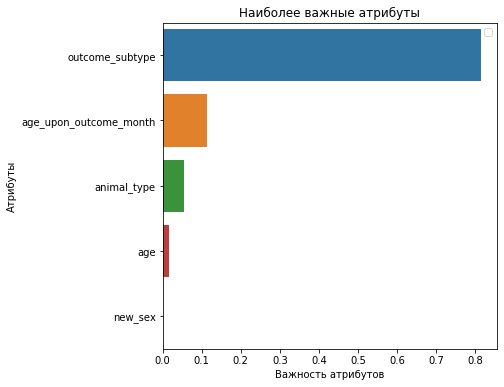

In [113]:
#Выведем наиболее важные атрибуты
headers = list(X_train.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()